In [1]:
import random
import numpy as np
import gym


In [2]:
env = gym.make('Taxi-v1')

[2019-02-09 15:51:33,997] Making new env: Taxi-v1
/Users/falkvandermeirsch/miniconda3/lib/python3.6/site-packages/gym/envs/registration.py:18: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
# initialize the Q_table
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0

In [5]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: q[(state, x)])

In [6]:
def update_q_table(prev_state, action, reward, next_state, alpha, gamma):
    qa = max(q[(next_state, a)] for a in range(env.action_space.n))
    q[(prev_state, action)] += alpha * (reward + gamma * qa - q[(prev_state, action)])


In [7]:
alpha = 0.8
gamma = 0.9
epsilon = 0.05
decay_steps = 1000
decay_rate = 0.1
n_iterations = 50_000

Q-learning algorithm

In [10]:
reward_episodes = []
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0

for i in range(n_iterations):
    r = 0
    prev_state = env.reset()
    
    while True:
        #env.render()
        
        # decaying epsilon
        if i % decay_steps == 0:
            epsilon *= (1 - decay_rate)
        
        # in each state we perform the action according to the epsilon greedy policy
        action = epsilon_greedy(prev_state, epsilon)
        
        # then we perform the transition to the next time step
        next_state, reward, done, _ = env.step(action)
        
        # update the Q_value using the updated_q_function
        # with the Q_learning rule
        update_q_table(prev_state, action, reward, next_state, alpha, gamma)
        
        # finally we update the previous state as next state
        prev_state = next_state
        
        # store all the rewards obtained
        r += reward
        
        # breaking the loop if reaching the terminal state
        if done:
            break
    
    if i % 1000 == 0:
        print(f'episode {i} - reward: {r}')
    reward_episodes.append(r)

env.close()

episode 0 - reward: -1130
episode 1000 - reward: 16
episode 2000 - reward: 8
episode 3000 - reward: 9
episode 4000 - reward: 5
episode 5000 - reward: 6
episode 6000 - reward: 8
episode 7000 - reward: 14
episode 8000 - reward: 9
episode 9000 - reward: 11
episode 10000 - reward: 9
episode 11000 - reward: 8
episode 12000 - reward: 13
episode 13000 - reward: 7
episode 14000 - reward: 12
episode 15000 - reward: 7
episode 16000 - reward: 8
episode 17000 - reward: 9
episode 18000 - reward: 16
episode 19000 - reward: 8
episode 20000 - reward: 9
episode 21000 - reward: 9
episode 22000 - reward: 9
episode 23000 - reward: 17
episode 24000 - reward: 9
episode 25000 - reward: 8
episode 26000 - reward: 9
episode 27000 - reward: 10
episode 28000 - reward: 13
episode 29000 - reward: 8
episode 30000 - reward: 15
episode 31000 - reward: 6
episode 32000 - reward: 10
episode 33000 - reward: 8
episode 34000 - reward: 7
episode 35000 - reward: 14
episode 36000 - reward: 6
episode 37000 - reward: 7
episode 3

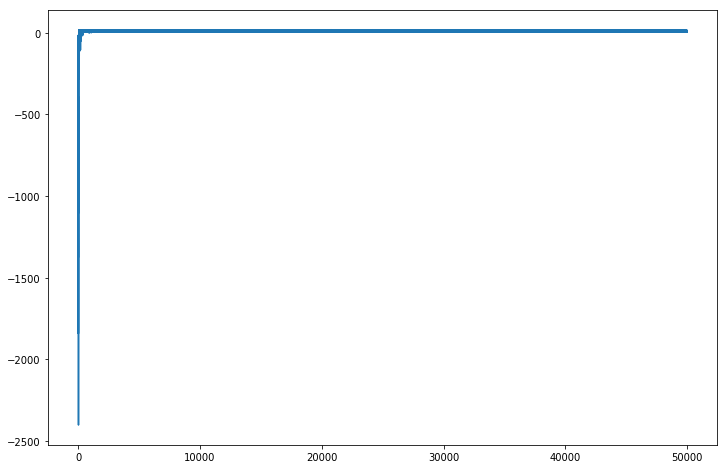

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
plt.plot(reward_episodes)

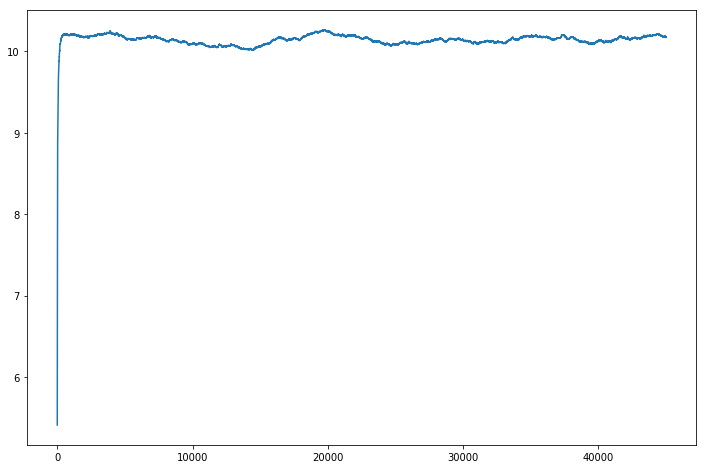

In [12]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

rew_avg = moving_average(reward_episodes, n=5000)
fig = plt.figure(figsize=(12,8))
plt.plot(rew_avg)